In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [2]:
# reading dataset
data = pd.read_csv('car_purchasing.csv',encoding='latin-1')
# printing first five rows of data
data.head(5)

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [3]:
# printing basic information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


In [4]:
# generating basic descriptive statistics
data.describe()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.241674,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.978862,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,40.949969,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.049901,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,51.612263,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


In [5]:
# checking for missing values
data.isna().sum()

customer name          0
customer e-mail        0
country                0
gender                 0
age                    0
annual Salary          0
credit card debt       0
net worth              0
car purchase amount    0
dtype: int64

* No null values exists

### EDA

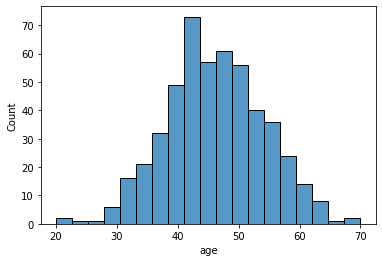

In [6]:
sns.histplot(data=data,x='age')

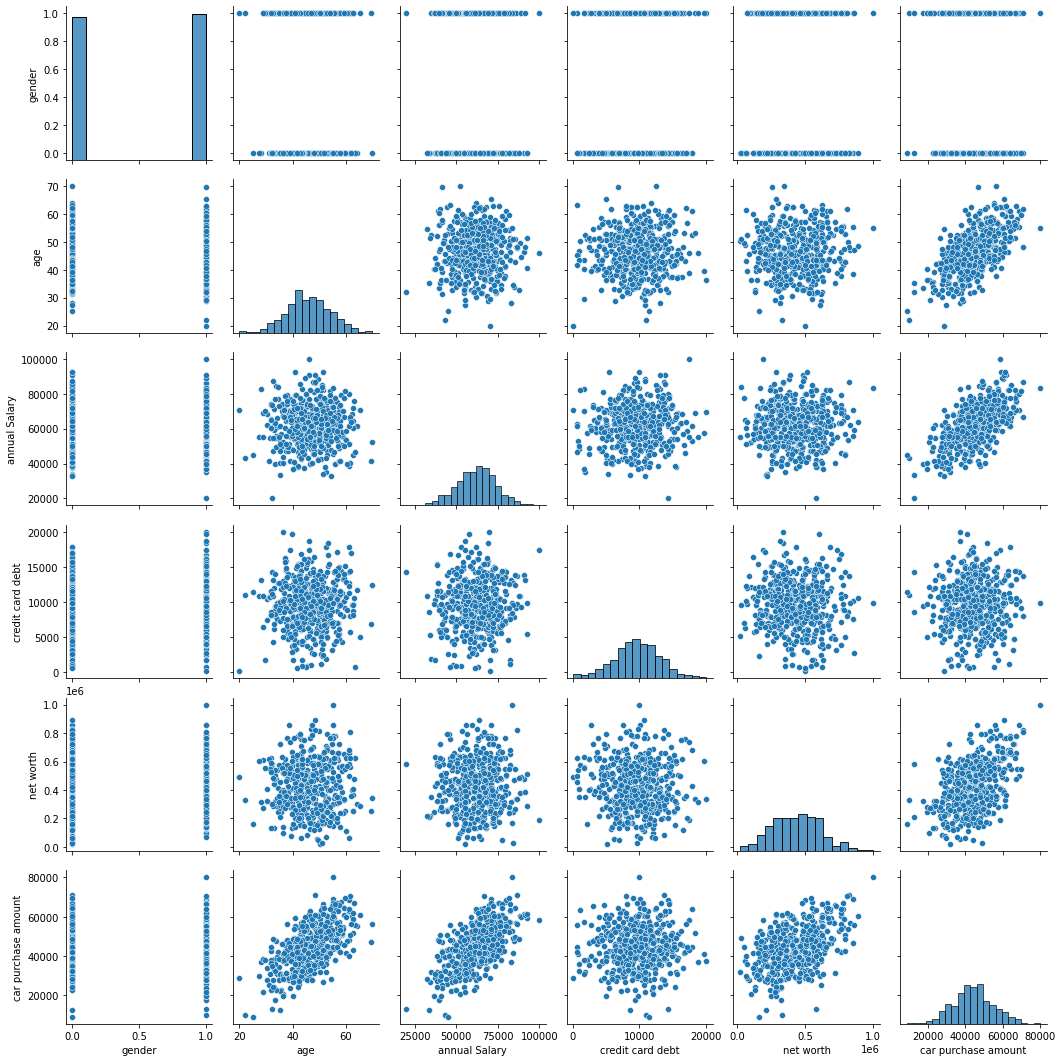

In [7]:
sns.pairplot(data)

We can observe that linear relationship exists between


*   age and car purchase amount
*   annual salary and car purchase amount
*   net worth and car purchase amount



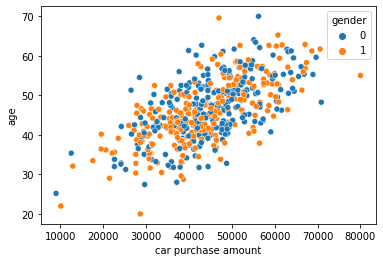

In [8]:
sns.scatterplot(data=data,x='car purchase amount',y='age',hue='gender')

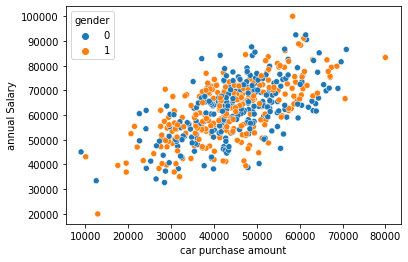

In [9]:
sns.scatterplot(data=data,x='car purchase amount',y='annual Salary',hue='gender')

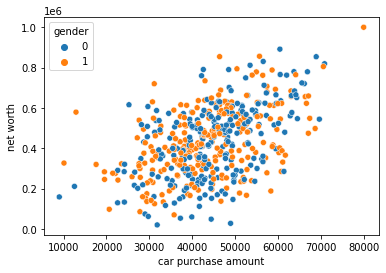

In [10]:
sns.scatterplot(data=data,x='car purchase amount',y='net worth',hue='gender')

Preprocessing

In [11]:
# dropping customer name, customer email and country
df = data.drop(['customer name','customer e-mail','country'],axis=1)
df

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248
...,...,...,...,...,...,...
495,0,41.462515,71942.40291,6995.902524,541670.1016,48901.44342
496,1,37.642000,56039.49793,12301.456790,360419.0988,31491.41457
497,1,53.943497,68888.77805,10611.606860,764531.3203,64147.28888
498,1,59.160509,49811.99062,14013.034510,337826.6382,45442.15353


In [12]:
# spliting to X and y
X = df.drop('car purchase amount',axis=1)
y = df[['car purchase amount']]

In [13]:
# scaling the data
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y)

In [14]:
# spliting to train and test 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=47)

In [15]:
X_train.shape, X_test.shape,y_train.shape, y_test.shape

((400, 5), (100, 5), (400, 1), (100, 1))

### ANN Model

Model 1

In [16]:
#build the model
model1 = Sequential()
model1.add(Dense(32, input_shape = (5,),activation = 'relu'))
model1.add(Dense(32, activation = 'relu'))
model1.add(Dense(1))
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                192       
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,281
Trainable params: 1,281
Non-trainable params: 0
_________________________________________________________________


In [17]:
# compile the model
model1.compile(optimizer='adam',
              loss = 'mean_squared_error',
              metrics =['mse'])

In [18]:
# Fit the model on a training set
history1 = model1.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.2)

Epoch 1/100
5/5 [==============================] - 1s 61ms/step - loss: 1.0430 - mse: 1.0430 - val_loss: 0.6124 - val_mse: 0.6124
Epoch 2/100
5/5 [==============================] - 0s 9ms/step - loss: 0.8493 - mse: 0.8493 - val_loss: 0.4891 - val_mse: 0.4891
Epoch 3/100
5/5 [==============================] - 0s 10ms/step - loss: 0.6831 - mse: 0.6831 - val_loss: 0.3953 - val_mse: 0.3953
Epoch 4/100
5/5 [==============================] - 0s 19ms/step - loss: 0.5520 - mse: 0.5520 - val_loss: 0.3164 - val_mse: 0.3164
Epoch 5/100
5/5 [==============================] - 0s 10ms/step - loss: 0.4336 - mse: 0.4336 - val_loss: 0.2465 - val_mse: 0.2465
Epoch 6/100
5/5 [==============================] - 0s 11ms/step - loss: 0.3223 - mse: 0.3223 - val_loss: 0.1860 - val_mse: 0.1860
Epoch 7/100
5/5 [==============================] - 0s 10ms/step - loss: 0.2365 - mse: 0.2365 - val_loss: 0.1355 - val_mse: 0.1355
Epoch 8/100
5/5 [==============================] - 0s 9ms/step - loss: 0.1695 - mse: 0.1695

In [19]:
y_pred1 = model1.predict(X_test)

4/4 [==============================] - 0s 3ms/step


In [20]:
mean_squared_error(y_test,y_pred1)

0.004344070560420272

Model 2

In [21]:
model2 = Sequential()
model2.add(Dense(64, activation = "relu", input_shape = (5,)))
model2.add(Dense(64, activation = "relu"))
model2.add(Dense(64, activation = "relu"))
model2.add(Dense(64, activation = "relu"))
model2.add(Dense(64, activation = "relu"))
model2.add(Dense(64, activation = "relu"))
model2.add(Dense(1, activation = None))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                384       
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 64)                4160      
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dense_8 (Dense)             (None, 64)                4160      
                                                                 
 dense_9 (Dense)             (None, 1)                

In [22]:
# compile the model
model2.compile(optimizer='adam',
               loss = 'mean_squared_error',
               metrics =['mse'])

In [23]:
# Fit the model on a training set
history2 = model2.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.1)

Epoch 1/100
6/6 [==============================] - 1s 39ms/step - loss: 0.9886 - mse: 0.9886 - val_loss: 0.6903 - val_mse: 0.6903
Epoch 2/100
6/6 [==============================] - 0s 9ms/step - loss: 0.7388 - mse: 0.7388 - val_loss: 0.4220 - val_mse: 0.4220
Epoch 3/100
6/6 [==============================] - 0s 8ms/step - loss: 0.3502 - mse: 0.3502 - val_loss: 0.0961 - val_mse: 0.0961
Epoch 4/100
6/6 [==============================] - 0s 8ms/step - loss: 0.1037 - mse: 0.1037 - val_loss: 0.2286 - val_mse: 0.2286
Epoch 5/100
6/6 [==============================] - 0s 9ms/step - loss: 0.1042 - mse: 0.1042 - val_loss: 0.0420 - val_mse: 0.0420
Epoch 6/100
6/6 [==============================] - 0s 8ms/step - loss: 0.0472 - mse: 0.0472 - val_loss: 0.0363 - val_mse: 0.0363
Epoch 7/100
6/6 [==============================] - 0s 9ms/step - loss: 0.0318 - mse: 0.0318 - val_loss: 0.0195 - val_mse: 0.0195
Epoch 8/100
6/6 [==============================] - 0s 9ms/step - loss: 0.0195 - mse: 0.0195 - va

In [24]:
y_pred2 = model2.predict(X_test)

4/4 [==============================] - 0s 3ms/step


In [25]:
mean_squared_error(y_test, y_pred2)

0.0011340046189856326

Model 3


In [26]:
model3 = Sequential()
model3.add(Dense(256, activation = "relu", input_shape = (5,)))
model3.add(Dense(128, activation = "relu"))
model3.add(Dense(128, activation = "relu"))
model3.add(Dense(64, activation = "relu"))
model3.add(Dense(64, activation = "relu"))
model3.add(Dense(32, activation = "relu"))
model3.add(Dense(1, activation = None))
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 256)               1536      
                                                                 
 dense_11 (Dense)            (None, 128)               32896     
                                                                 
 dense_12 (Dense)            (None, 128)               16512     
                                                                 
 dense_13 (Dense)            (None, 64)                8256      
                                                                 
 dense_14 (Dense)            (None, 64)                4160      
                                                                 
 dense_15 (Dense)            (None, 32)                2080      
                                                                 
 dense_16 (Dense)            (None, 1)                

In [31]:
# compile the model
model3.compile(optimizer='adam',
               loss = 'mean_absolute_error',
               metrics =['mse'])

In [32]:
# Fit the model on a training set
history3 = model3.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.1)

Epoch 1/100
6/6 [==============================] - 1s 42ms/step - loss: 0.2957 - mse: 0.1385 - val_loss: 0.2907 - val_mse: 0.0914
Epoch 2/100
6/6 [==============================] - 0s 12ms/step - loss: 0.1707 - mse: 0.0422 - val_loss: 0.1214 - val_mse: 0.0195
Epoch 3/100
6/6 [==============================] - 0s 10ms/step - loss: 0.1029 - mse: 0.0174 - val_loss: 0.0551 - val_mse: 0.0057
Epoch 4/100
6/6 [==============================] - 0s 9ms/step - loss: 0.0611 - mse: 0.0060 - val_loss: 0.0647 - val_mse: 0.0069
Epoch 5/100
6/6 [==============================] - 0s 9ms/step - loss: 0.0481 - mse: 0.0038 - val_loss: 0.0411 - val_mse: 0.0026
Epoch 6/100
6/6 [==============================] - 0s 9ms/step - loss: 0.0450 - mse: 0.0031 - val_loss: 0.0228 - val_mse: 8.2566e-04
Epoch 7/100
6/6 [==============================] - 0s 10ms/step - loss: 0.0284 - mse: 0.0013 - val_loss: 0.0295 - val_mse: 0.0016
Epoch 8/100
6/6 [==============================] - 0s 10ms/step - loss: 0.0287 - mse: 0.0

In [33]:
y_pred3 = model3.predict(X_test)

4/4 [==============================] - 0s 3ms/step


In [34]:
mean_squared_error(y_test,y_pred3)

0.0007348148271309078